## Face Recognition - 28/05/202

The training is done using data augmentation on training data set. The model used for training is deeper so as to increase the training data accuracy. The model has a training set accuracy>0.7, valid set accuracy>0.95 and test set accuracy>0.8 

The next task is to change the cv2 cascade model for different poses of face employing different occlusion techniques.

In [1]:
import tensorflow as tf
import pathlib
import numpy as np

In [2]:
data_dir='./images/train/'   #path of training directory
data_dir = pathlib.Path(data_dir)

data_dr='./images/valid/'    #path of valid_set directory
data_dr = pathlib.Path(data_dr)

image_count = len(list(data_dir.glob('*/*.jpg')))

In [3]:
# generator for training set and valid set. The training data generator employs data augmentation in form of flips and zooms.

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [4]:
# name of classes
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['Anne_Hathaway', 'Ayushmann_Khurrana', 'Brad_Pitt', 'Irrfan_Khan',
       'Jen_Aniston', 'Jen_Lawrence', 'Johnny_Depp', 'Pankaj_Tripathi',
       'Robert_DowneyJr', 'Will_Smith'], dtype='<U18')

In [5]:
#iterable form of generators

train_data_gen = train_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

valid_data_gen = image_generator.flow_from_directory(directory=str(data_dr),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 762 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [6]:
images,labels=next(train_data_gen)
x_test,y_test=next(valid_data_gen)

In [7]:
import Augmentor
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [8]:
#defining the model 

num_classes = 10
input_shape = (224, 224, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
#compliling the model

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [10]:
# training the model upto a satisfying value of accuracy as well as val_accuracy

h = model.fit(train_data_gen, steps_per_epoch=STEPS_PER_EPOCH, epochs=40, 
              verbose=1, validation_data=valid_data_gen, validation_steps=41)

Epoch 1/40
24/24 [==============================] - 55s 2s/step - loss: 2.2767 - accuracy: 0.1562 - val_loss: 2.2912 - val_accuracy: 0.1572
Epoch 2/40
24/24 [==============================] - 50s 2s/step - loss: 2.2822 - accuracy: 0.1444 - val_loss: 2.3218 - val_accuracy: 0.1627
Epoch 3/40
24/24 [==============================] - 50s 2s/step - loss: 2.2721 - accuracy: 0.1378 - val_loss: 2.2594 - val_accuracy: 0.1549
Epoch 4/40
24/24 [==============================] - 50s 2s/step - loss: 2.2591 - accuracy: 0.1614 - val_loss: 2.1348 - val_accuracy: 0.1588
Epoch 5/40
24/24 [==============================] - 50s 2s/step - loss: 2.2501 - accuracy: 0.1588 - val_loss: 2.2103 - val_accuracy: 0.1603
Epoch 6/40
24/24 [==============================] - 50s 2s/step - loss: 2.2271 - accuracy: 0.1890 - val_loss: 2.2329 - val_accuracy: 0.1905
Epoch 7/40
24/24 [==============================] - 49s 2s/step - loss: 2.1905 - accuracy: 0.2257 - val_loss: 2.2530 - val_accuracy: 0.2414
Epoch 8/40
24/24 [==

In [25]:
#save the model
model.save('./model_27.h5')

In [26]:
h = model.fit(train_data_gen, steps_per_epoch=STEPS_PER_EPOCH, epochs=20, 
              verbose=1,validation_data=valid_data_gen,validation_steps=41)

Epoch 1/20
24/24 [==============================] - 42s 2s/step - loss: 0.7661 - accuracy: 0.7310 - val_loss: 0.2132 - val_accuracy: 0.9001
Epoch 2/20
24/24 [==============================] - 42s 2s/step - loss: 0.7231 - accuracy: 0.7349 - val_loss: 0.2606 - val_accuracy: 0.9466
Epoch 3/20
24/24 [==============================] - 43s 2s/step - loss: 0.7604 - accuracy: 0.7178 - val_loss: 0.2799 - val_accuracy: 0.9357
Epoch 4/20
24/24 [==============================] - 43s 2s/step - loss: 0.7228 - accuracy: 0.7415 - val_loss: 0.2539 - val_accuracy: 0.9210
Epoch 5/20
24/24 [==============================] - 43s 2s/step - loss: 0.7596 - accuracy: 0.7270 - val_loss: 0.2744 - val_accuracy: 0.9435
Epoch 6/20
24/24 [==============================] - 43s 2s/step - loss: 0.6793 - accuracy: 0.7546 - val_loss: 0.3072 - val_accuracy: 0.9574
Epoch 7/20
24/24 [==============================] - 44s 2s/step - loss: 0.6430 - accuracy: 0.7612 - val_loss: 0.2028 - val_accuracy: 0.9642
Epoch 8/20
24/24 [==

In [27]:
model.save('./model_27.h5')

In [28]:
import os
from keras.models import load_model
import cv2

# path to test files
test_dirpath = os.path.join('./images/test/')
test_filepaths = [os.path.join(test_dirpath, f) for f in os.listdir(test_dirpath)]

cascade_path = './model/cv2/haarcascade_frontalface_default.xml'   # contains the path to the cv2 model file 
cascade = cv2.CascadeClassifier(cascade_path)

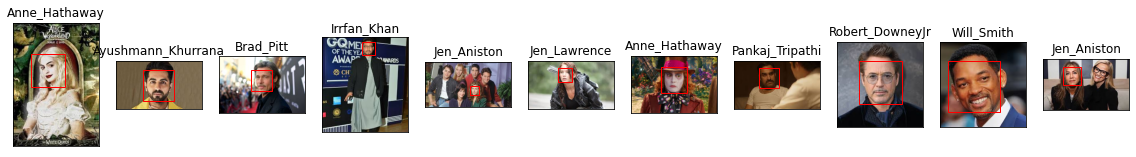

In [31]:
from PIL import Image
import numpy as np
from skimage import transform
from keras.preprocessing import image

# load the file in array format
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image


aligned_images = [] 
classes=[]

# predict the class of the image
for i in range(len(test_filepaths)):
    img=load(test_filepaths[i])
    img_class=model.predict_classes(img) 
    prediction = img_class[0]
    classes.append(img_class[0])


import matplotlib.patches as patches
from imageio import imread
import cv2

fig, axes = plt.subplots(1, len(test_filepaths), figsize=(20, 5))

margin=10       
        
for i in range(len(test_filepaths)):
    axes[i].set_title((CLASS_NAMES[classes[i]]))
    axes[i].imshow(imread(test_filepaths[i]))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    img = imread(test_filepaths[i])
    faces = cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=5,minSize=(10, 10),flags=cv2.CASCADE_SCALE_IMAGE)
    (x, y, w, h) = faces[0]
    cropped = img[y-margin//2:y+h-margin//2,
                    x-margin//2:x+w-margin//2, :]
    
    (w,h,z)=cropped.shape
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    axes[i].add_patch(rect)
    
    
plt.show()

In [32]:
from sklearn.metrics import accuracy_score,f1_score

y = ['Anne_Hathaway', 'Ayushmann_Khurrana','Brad_Pitt','Irrfan_Khan','Jen_Aniston',
     'Jen_Lawrence','Johnny_Depp','Pankaj_Tripathi','Robert_DowneyJr','Will_Smith','Jen_Aniston']
pred=[]
for i in range(len(classes)):
    pred.append(CLASS_NAMES[classes[i]])

print(accuracy_score(y,pred))
print(f1_score(y,pred,average='weighted'))

0.9090909090909091
0.8787878787878788


The accuracy of the training set is: 0.78

The accuracy of the validation set is: 0.96

The accuracy of the test set is: 0.91

.

Q. How to increase the validation set accuracy? 

A. Increase your training data set.

.

Q. How to increase the training set accuracy?

A. Increase the depth of your neural network, i.e., increase the number of layers
